<div align="center">
    <h1>Shinkansen Travel Experience</h1>
</div>


<div align="center">
    <h2>Problem Statement</h2>
</div>

**Goal**:

The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

**Dataset**: 

The problem consists of 2 separate datasets: Travel data & Survey data. Travel data has information related to passengers and attributes related to the Shinkansen train, in which they travelled. The survey data is aggregated data of surveys indicating the post-service experience.

The data has been split into two groups:

1. Train_Data
2. Test_Data

**Target Variable**: 

Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set will be used to build the machine learning model. The training set has labels for the target column - Overall_Experience.

The testing set will be used to see how well the model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

## **Importing the Libraries required**

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from scipy import stats

## **Loading the Training dataset**

In [113]:
travel_data = pd.read_csv("Traveldata_train.csv")

In [114]:
survey_data = pd.read_csv("Surveydata_train.csv")

**Merge the travel_data and survey_data dataframes on the 'ID' column and store it in merged_traveldata**

In [115]:
merged_traveldata = travel_data.merge(survey_data, on = 'ID')

**Create a copy of merged_traveldata and store it in df**

In [116]:
df = merged_traveldata.copy()

## **Overview of the Training dataset**

### **View the first and last 5 rows of the dataset**

In [117]:
df.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0,0,...,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0,0,...,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0,1,...,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0,0,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0,1,...,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [118]:
df.tail(5)

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0,0,...,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0,1,...,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0,1,...,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0,0,...,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0,0,...,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


### **Understand the shape of the dataset**

In [119]:
df.shape

(94379, 25)

### **Check the data types of the columns for the dataset**

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

**Observations**

1. There are a total of 24 columns and 94379 rows.
2. The column Gender has some missing values (non-null count is less than the total number of rows).
3. The columns Customer_Type and Type_Travel also have missing values.
4. Some columns such as Age, Departure_Delay_in_Mins, Arrival_Delay_in_Mins, Seat_Comfort, Arrival_Time_Convenient, Catering, Onboard_Wifi_Service, Onboard_Entertainment, Online_Support, Ease_of_Online_Booking, Onboard_Service, Legroom, Baggage_Handling, CheckIn_Service, Cleanliness, and Online_Boarding also have some missing values.
5. The data types of the columns are either int64, float64, or object (categorical or text data).

### **Check the summary statistics of the dataset**

In [121]:
df.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Overall_Experience
count,9.437900e+04,94346.000000,94379.000000,94322.000000,94022.000000,94379.000000
mean,9.884719e+07,39.419647,1978.888185,14.647092,15.005222,0.546658
std,2.724501e+04,15.116632,1027.961019,38.138781,38.439409,0.497821
min,9.880000e+07,7.000000,50.000000,0.000000,0.000000,0.000000
25%,9.882360e+07,27.000000,1359.000000,0.000000,0.000000,0.000000
50%,9.884719e+07,40.000000,1923.000000,0.000000,0.000000,1.000000
75%,9.887078e+07,51.000000,2538.000000,12.000000,13.000000,1.000000
max,9.889438e+07,85.000000,6951.000000,1592.000000,1584.000000,1.000000


### **Drop ID columns for the dataset**

In [122]:
df = df.drop(["ID"], axis = 1)

## Creating A Scikit-learn Pipeline with a Median Imputer and Several Classifiers

**To make predictions all columns are used except ID and Overall Experience**

In [123]:
# Define features and target
X = df.drop(columns=['Overall_Experience']) #features
y = df['Overall_Experience'] #target

**Split the dataset into training and testing sets**

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Define categorical and numerical features**

In [125]:
categorical_features = [
    'Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class','Seat_Comfort', 'Seat_Class', 'Arrival_Time_Convenient', 'Catering', 'Platform_Location', 'Onboard_Wifi_Service', 'Onboard_Entertainment','Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service','Legroom', 'Baggage_Handling', 'CheckIn_Service', 'Cleanliness', 'Online_Boarding'

]
numerical_features = [
    'Age', 'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins'
]

**Define transformers for categorical and numerical features**

In [48]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])   # convert categorical features to binary vectors

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),    # impute missing values with median value
    ('scaler', StandardScaler())])                    # standardize numerical features

**Create a preprocessor using ColumnTransformer**

In [49]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

**Define a list of classifiers to be evaluated**

In [50]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('MLP', MLPClassifier(random_state=42, hidden_layer_sizes=(10,10), activation='relu', solver='adam')),
    ('ExtraTrees', ExtraTreesClassifier(random_state=42))
]

/Users/estherteye/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


**Iterate over classifiers and compare their performance**

In [51]:
for classifier_name, classifier in classifiers:
    # Create a pipeline with the preprocessor and classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])
    
    # Train the model and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the results
    print(f"{classifier_name}: {accuracy:.4f}")

Logistic Regression: 0.9036
Random Forest: 0.9519
SVM: 0.9516
KNN: 0.9279
Decision Tree: 0.9273
AdaBoost: 0.9002
Gradient Boosting: 0.9248
XGBoost: 0.9539
MLP: 0.9478
ExtraTrees: 0.9543


**Observations**

1. XGBoost, Random Forest, and SVM are the top-performing classifiers with accuracy scores of 0.9539, 0.9519, and 0.9516, respectively.
2. Logistic Regression and AdaBoost achieved lower accuracy scores of 0.9036 and 0.9002, respectively.
3. KNN and Decision Tree models also performed relatively well with accuracy scores of 0.9279 and 0.9273, respectively.
4. The accuracy scores of the top-performing classifiers are quite close to each other, indicating that they may be equally effective for this classification task.

## Creating A Scikit-learn Pipeline with a KNN Imputer and Several Classifiers

**Create transformers for categorical and numerical features**

In [52]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])  # convert categorical features to binary vectors

numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),               # impute missing values with KNN 
    ('scaler', StandardScaler())])                        # standardize numerical features

**Create a preprocessor using ColumnTransformer**

In [53]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

**Define a list of classifiers to be evaluated**

In [54]:
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('MLP', MLPClassifier(random_state=42, hidden_layer_sizes=(10,10), activation='relu', solver='adam')),
    ('ExtraTrees', ExtraTreesClassifier(random_state=42))
]

/Users/estherteye/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


**Iterate over classifiers and compare their performance**

In [55]:
for classifier_name, classifier in classifiers:
    # Create a pipeline with the preprocessor and classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])
    
    # Train the model and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the results
    print(f"{classifier_name}: {accuracy:.4f}")

Logistic Regression: 0.9036
Random Forest: 0.9513
SVM: 0.9514
KNN: 0.9280
Decision Tree: 0.9283
AdaBoost: 0.9002
Gradient Boosting: 0.9246
XGBoost: 0.9525
MLP: 0.9494
ExtraTrees: 0.9536


**Observations**

1. The accuracy scores of the Logistic Regression and AdaBoost models remain the same at 0.9036 and 0.9002, respectively.
2. The Random Forest, SVM, and XGBoost models achieve slightly lower accuracy scores compared to the previous results, with accuracy scores of 0.9513, 0.9514, and 0.9525, respectively.
3. The KNN and Decision Tree models perform similarly to the previous results, with accuracy scores of 0.9280 and 0.9283, respectively.
4. The Gradient Boosting model achieves a slightly lower accuracy score of 0.9246 compared to the previous results.
5. Overall, the top-performing classifiers remain the same with XGBoost, Random Forest, and SVM achieving the highest accuracy scores. However, the differences in accuracy scores between the top-performing models are relatively small.
6. The KNN imputation for the numerical features did not significantly impact the classification results.

## Creating A Scikit-learn Pipeline with a Mean Imputer and Several Classifiers

**Create transformers for categorical and numerical features**

In [56]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])   # convert categorical features to binary vectors

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),           # impute missing values with mean 
    ('scaler', StandardScaler())])                         # standardize numerical features

**Create a preprocessor using ColumnTransformer**

In [57]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

**Define a list of classifiers to be evaluated**

In [58]:
# List of classifiers to test
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('SVM', SVC(random_state=42)),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('MLP', MLPClassifier(random_state=42, hidden_layer_sizes=(10,10), activation='relu', solver='adam')),
    ('ExtraTrees', ExtraTreesClassifier(random_state=42))
]

/Users/estherteye/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


**Iterate over classifiers and compare their performance**

In [59]:
for classifier_name, classifier in classifiers:
    # Create a pipeline with the preprocessor and classifier
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', classifier)])
    
    # Train the model and make predictions
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the results
    print(f"{classifier_name}: {accuracy:.4f}")

Logistic Regression: 0.9037
Random Forest: 0.9527
SVM: 0.9515
KNN: 0.9279
Decision Tree: 0.9279
AdaBoost: 0.9002
Gradient Boosting: 0.9251
XGBoost: 0.9551
MLP: 0.9485
ExtraTrees: 0.9549


**Observations**

1. The accuracy score of the Logistic Regression model remains largely the same at 0.9037.
2. The accuracy scores of the Random Forest, SVM, and KNN models are slightly lower compared to the previous results, with accuracy scores of 0.9527, 0.9515, and 0.9279, respectively.
3. The Decision Tree model achieves the same accuracy score of 0.9279 as the KNN model.
4. The Gradient Boosting model achieves a slightly lower accuracy score of 0.9251 compared to the previous results.
5. The XGBoost model achieves the highest accuracy score of 0.9551, which is slightly higher than the previous result of 0.9539.
6. Overall, the XGBoost, Random Forest, and SVM models are still the top-performing classifiers, with XGBoost achieving the highest accuracy score. The differences in accuracy scores between the top-performing models are relatively small.
7. Mean imputation for the numerical features did not significantly impact the classification results.

### **Observations After Three Methods**

Here are the main points based on the results:

1. XGBoost achieved the highest accuracy score on the test data, regardless of the imputation method used for the numerical features.
2. The differences in accuracy scores between the top-performing classifiers (XGBoost, Random Forest, and SVM) were relatively small, indicating that they may be equally effective for this classification task.
3. The choice of imputation method did not significantly impact the classification results, and the differences in accuracy scores between the imputation methods were relatively small.
4. Other factors, such as computational complexity, bias, interpretability, or other performance metrics, may need to be considered when choosing the best imputation method.
5. Based on the results, the choice of classifier may be more important than the choice of imputation method for this particular dataset and classification task.
6. Overall, XGBoost is the best classifier for this particular dataset and classification task, while the choice of imputation method may depend on other considerations beyond accuracy score. For the purpose of this test, the imputation method chosen was the mean

## Using Model with Highest Accuracy - XGBoost

**Create transformers for categorical and numerical features**

In [141]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

**Create a preprocessor using ColumnTransformer**

In [142]:
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

**Create the pipeline with the preprocessor and the XGBoost Classifier**

In [143]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))])

/Users/estherteye/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


**Fit the pipeline to the training data**

In [144]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Travel_Distance',
                                                   'Departure_Delay_in_Mins',
                                                   'Arrival_Delay_in_Mins']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=42, ...))])

**Make predictions on the test set**

In [145]:
y_pred = pipeline.predict(X_test)

**Evaluate the pipeline**

In [146]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9550752278025005

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      8405
           1       0.96      0.95      0.96     10471

    accuracy                           0.96     18876
   macro avg       0.95      0.96      0.95     18876
weighted avg       0.96      0.96      0.96     18876



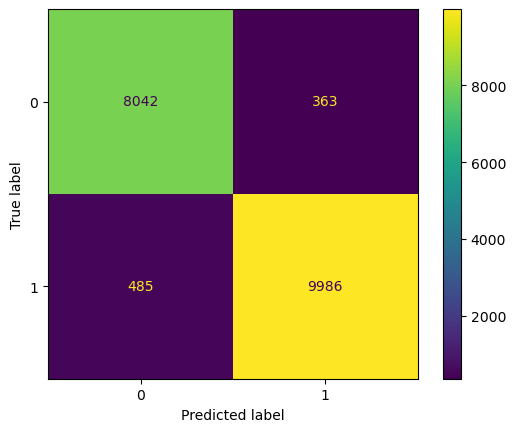

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot()

**Observations**

*Based on the output of accuracy, precision, recall and F1 scores, the following observations can be made*:

1. The XGBoost classifier with mean imputation achieved a high accuracy score of 0.9551 on the test data, indicating that it is a strong classifier for this particular dataset and classification task.
2. The precision, recall, and F1 scores for both classes (0 and 1) were relatively high, indicating that the classifier is able to effectively distinguish between the two classes.
3. The macro average of the precision, recall, and F1 scores were also high, indicating that the classifier performs well across both classes.

*Based on the confusion matrix, the following observations can be made*:

1. The classifier correctly predicted the negative overall travel experience of 8042 customers (true negatives), indicating that it is able to accurately identify customers who had a poor experience.
2. The classifier correctly predicted the positive overall travel experience of 9986 customers (true positives), indicating that it is able to accurately identify customers who had a good experience.
3. The classifier incorrectly predicted the positive overall travel experience of 363 customers who actually had a negative experience (false positives), which could potentially lead to misdirected efforts to retain or reward those customers.
4. The classifier also incorrectly predicted the negative overall travel experience of 485 customers who actually had a positive experience (false negatives), which could potentially lead to missed opportunities to improve the customer experience or address issues.
5. Overall, the XGBoost classifier with mean imputation performed well in terms of accuracy, precision, recall, and F1 score, as well as in the confusion matrix, indicating that it is a strong model for predicting the overall travel experience of customers based on their demographic and travel-related features.


## Predictions for Test Data

### **Loading the Test dataset**

In [39]:
travel_data_test = pd.read_csv("Traveldata_test.csv")

In [40]:
survey_data_test = pd.read_csv("Surveydata_test.csv")

**Merge the travel_data_test and survey_data_test dataframes on the 'ID' column and store it in merged_traveldata_test**

In [41]:
merged_traveldata_test = travel_data_test.merge(survey_data_test, on = 'ID')

**Create a copy of merged_traveldata_test and store it in df**

In [42]:
df_test = merged_traveldata_test.copy()

## Overview of the Test dataset

### **View the first and last 5 rows of the dataset**

In [43]:
df_test.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,99900001,Female,NaN,36.0,Business Travel,Business,532,0.0,0.0,Acceptable,...,Needs Improvement,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Poor
1,99900002,Female,Disloyal Customer,21.0,Business Travel,Business,1425,9.0,28.0,Extremely Poor,...,Acceptable,Poor,Acceptable,Acceptable,Excellent,Acceptable,Good,Acceptable,Excellent,Acceptable
2,99900003,Male,Loyal Customer,60.0,Business Travel,Business,2832,0.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Needs Improvement,Excellent
3,99900004,Female,Loyal Customer,29.0,Personal Travel,Eco,1352,0.0,0.0,Acceptable,...,Poor,Acceptable,Excellent,Poor,Acceptable,Needs Improvement,Excellent,Excellent,Excellent,Poor
4,99900005,Male,Disloyal Customer,18.0,Business Travel,Business,1610,17.0,0.0,Excellent,...,Excellent,Excellent,Excellent,Excellent,NaN,Acceptable,Excellent,Excellent,Excellent,Excellent


In [44]:
df_test.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins,Seat_Comfort,...,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
35597,99935598,Male,Loyal Customer,8.0,Personal Travel,Eco,1334,0.0,0.0,Needs Improvement,...,Acceptable,Needs Improvement,Acceptable,Acceptable,Good,Excellent,Good,Acceptable,Good,Acceptable
35598,99935599,Female,Loyal Customer,53.0,Business Travel,Business,1772,0.0,0.0,Needs Improvement,...,Acceptable,Excellent,Excellent,Good,Good,Good,Good,Acceptable,Good,Good
35599,99935600,Male,Disloyal Customer,22.0,Business Travel,Eco,1180,0.0,0.0,Good,...,Needs Improvement,Good,Poor,Needs Improvement,Poor,Acceptable,Poor,Poor,Excellent,Needs Improvement
35600,99935601,Female,Loyal Customer,67.0,Personal Travel,Eco,420,23.0,16.0,Excellent,...,Acceptable,Excellent,Good,Excellent,Excellent,Excellent,Excellent,Acceptable,Excellent,Good
35601,99935602,Male,NaN,20.0,Personal Travel,Eco,1680,0.0,0.0,Good,...,Poor,Good,Poor,Poor,Acceptable,Good,Good,Needs Improvement,Good,Poor


### **Understand the shape of the dataset**

In [45]:
df_test.shape

(35602, 24)

### **Check the data types of the columns for the dataset**

In [46]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35602 entries, 0 to 35601
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       35602 non-null  int64  
 1   Gender                   35572 non-null  object 
 2   Customer_Type            32219 non-null  object 
 3   Age                      35591 non-null  float64
 4   Type_Travel              32154 non-null  object 
 5   Travel_Class             35602 non-null  object 
 6   Travel_Distance          35602 non-null  int64  
 7   Departure_Delay_in_Mins  35573 non-null  float64
 8   Arrival_Delay_in_Mins    35479 non-null  float64
 9   Seat_Comfort             35580 non-null  object 
 10  Seat_Class               35602 non-null  object 
 11  Arrival_Time_Convenient  32277 non-null  object 
 12  Catering                 32245 non-null  object 
 13  Platform_Location        35590 non-null  object 
 14  Onboard_Wifi_Service  

### **Check the summary statistics of the dataset**

In [47]:
df_test.describe()

,ID,Age,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
count,3.560200e+04,35591.000000,35602.000000,35573.000000,35479.000000
mean,9.991780e+07,39.446995,1987.151761,14.880696,15.308802
std,1.027756e+04,15.137554,1024.308863,37.895453,38.531293
min,9.990000e+07,7.000000,50.000000,0.000000,0.000000
25%,9.990890e+07,27.000000,1360.000000,0.000000,0.000000
50%,9.991780e+07,40.000000,1929.000000,0.000000,0.000000
75%,9.992670e+07,51.000000,2559.000000,13.000000,13.000000
max,9.993560e+07,85.000000,6868.000000,978.000000,970.000000


## **Make predictions on the test set using the Prediction pipeline created**

In [48]:
df_test['Overall_Experience'] = pipeline.predict(df_test)

**Create new dataframe with just ID and Overall Experience**

In [49]:
travel_data_predictions = df_test[['ID', 'Overall_Experience']]

**Make 'ID' index of the dataframe**

In [50]:
travel_data_predictions = travel_data_predictions.set_index('ID')

**Save dataframe as csv**

In [51]:
travel_data_predictions.to_csv('Esther_Teye_Travel_data_predictions.csv')